In [1]:
# Import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import lifelines
import matplotlib.pyplot as plt
import seaborn as sns


# Import and tidy data
%run tidy_data.py

# Risk evaluation
%run scripts.py

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 174 non-null    object  
 1   age                174 non-null    int64   
 2   variant_histology  174 non-null    category
 3   ypT_stage          174 non-null    category
 4   ypN_stage          174 non-null    category
 5   recurrence         173 non-null    category
 6   fu_recurrence      174 non-null    float64 
 7   dod                171 non-null    category
 8   doc                170 non-null    category
 9   fu_censor          174 non-null    float64 
 10  sex                174 non-null    object  
 11  year_cystectomy    173 non-null    float64 
 12  ypT_group1         174 non-null    category
 13  ypT_group2         174 non-null    category
 14  ypN_group1         174 non-null    category
 15  ypN_group2         174 non-null    category
 16  dre     

# OR - Tumor recurrence

In [2]:
# Copy full dataframe and drop NAN values
df_recurrence = df.dropna(subset=['recurrence']).copy()

In [3]:
# Create dummy variables for predictors and outcome
df_recurrence = pd.get_dummies(df_recurrence, columns=['sex','variant_histology','ypT_group1','ypN_group1','recurrence'], drop_first=True)

# sex: Female vs Male
# variant_histology: No vs Yes
# ypT: pT0-pTis-pTa vs pT2-pT3
# ypN: pN0 vs pN1-pN2-pN3
df_recurrence = df_recurrence.rename(columns={'ypT_group1_pT2-pT3':'ypT','ypN_group1_pN1-pN2-pN3':'ypN','sex_Male':'sex','variant_histology_Yes':'variant_histology','recurrence_Yes':'recurrence'})
df_recurrence = df_recurrence[['age','sex','variant_histology','ypT','ypN','recurrence','fu_recurrence']]
df_recurrence.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 173
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                173 non-null    int64  
 1   sex                173 non-null    uint8  
 2   variant_histology  173 non-null    uint8  
 3   ypT                173 non-null    uint8  
 4   ypN                173 non-null    uint8  
 5   recurrence         173 non-null    uint8  
 6   fu_recurrence      173 non-null    float64
dtypes: float64(1), int64(1), uint8(5)
memory usage: 4.9 KB


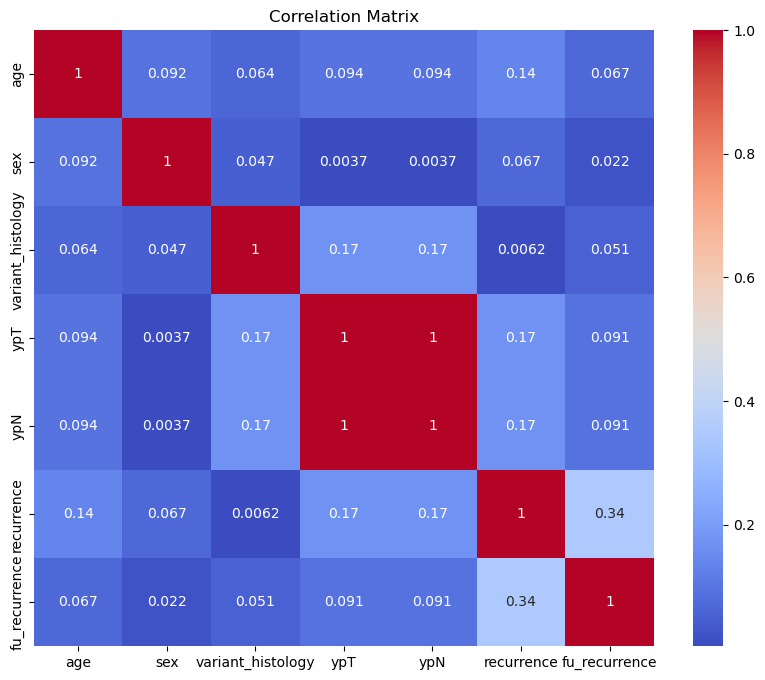

,age,sex,variant_histology,ypT,ypN,recurrence,fu_recurrence
age,1.000000,0.091561,0.064155,0.093528,0.093528,0.136235,0.067094
sex,0.091561,1.000000,0.047485,0.003670,0.003670,0.067118,0.021808
variant_histology,0.064155,0.047485,1.000000,0.171809,0.171809,0.006205,0.051366
ypT,0.093528,0.003670,0.171809,1.000000,1.000000,0.167398,0.091108
ypN,0.093528,0.003670,0.171809,1.000000,1.000000,0.167398,0.091108
recurrence,0.136235,0.067118,0.006205,0.167398,0.167398,1.000000,0.343683
fu_recurrence,0.067094,0.021808,0.051366,0.091108,0.091108,0.343683,1.000000


In [4]:
# Correlation matrix
correlation_matrix = df_recurrence.corr().abs()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

correlation_matrix

In [5]:
# age
logistic_regression(df_recurrence, 'age', 'recurrence')

Optimization terminated successfully.
         Current function value: 129.546509
         Iterations 5


,Odds Ratio,Lower CI,Upper CI,P-value
age,0.971051,0.939928,1.003205,0.077157


In [6]:
# sex
logistic_regression(df_recurrence, 'sex', 'recurrence')

Optimization terminated successfully.
         Current function value: 123.688049
         Iterations 5


,Odds Ratio,Lower CI,Upper CI,P-value
sex,1.382143,0.672737,2.839622,0.378347


In [7]:
# variant_histology
logistic_regression(df_recurrence, 'variant_histology', 'recurrence')

Optimization terminated successfully.
         Current function value: 121.870484
         Iterations 4


,Odds Ratio,Lower CI,Upper CI,P-value
variant_histology,1.027778,0.532254,1.984631,0.934958


In [8]:
# ypT
logistic_regression(df_recurrence, 'ypT', 'recurrence')

Optimization terminated successfully.
         Current function value: 131.314498
         Iterations 5


,Odds Ratio,Lower CI,Upper CI,P-value
ypT,0.432173,0.20251,0.922291,0.030073


In [9]:
# ypN
logistic_regression(df_recurrence, 'ypN', 'recurrence')

Optimization terminated successfully.
         Current function value: 131.314498
         Iterations 5


,Odds Ratio,Lower CI,Upper CI,P-value
ypN,2.313889,1.084256,4.938023,0.030073


In [10]:
# Adjusted OR - Multivariate 1
logistic_regression(df_recurrence, ['age','sex','variant_histology','ypT'], 'recurrence')

Optimization terminated successfully.
         Current function value: 140.149242
         Iterations 5


,Odds Ratio,Lower CI,Upper CI,P-value
age,0.974796,0.942963,1.007704,0.131833
sex,1.347876,0.642851,2.826115,0.429359
variant_histology,1.154791,0.579339,2.301835,0.682589
ypT,0.437311,0.199745,0.957424,0.038566


In [11]:
# Adjusted OR - Multivariate 2
logistic_regression(df_recurrence, ['age','sex','variant_histology','ypN'], 'recurrence')

Optimization terminated successfully.
         Current function value: 140.149242
         Iterations 5


,Odds Ratio,Lower CI,Upper CI,P-value
age,0.974796,0.942963,1.007704,0.131833
sex,1.347876,0.642851,2.826115,0.429359
variant_histology,1.154791,0.579339,2.301835,0.682589
ypN,2.286704,1.044469,5.006383,0.038566


# HR - Tumor recurrence

In [12]:
# age
cox_regression(df_recurrence, 'fu_recurrence', 'age', 'recurrence')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
age,0.968108,0.941693,0.995265,0.021663


In [13]:
# sex
cox_regression(df_recurrence, 'fu_recurrence', 'sex', 'recurrence')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
sex,1.272087,0.695782,2.325734,0.434369


In [14]:
# variant_histology
cox_regression(df_recurrence, 'fu_recurrence', 'variant_histology', 'recurrence')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
variant_histology,1.032647,0.602799,1.769012,0.906885


In [15]:
# ypT
cox_regression(df_recurrence, 'fu_recurrence', 'ypT', 'recurrence')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
ypT,0.659956,0.373928,1.164773,0.151643


In [16]:
# ypN
cox_regression(df_recurrence, 'fu_recurrence', 'ypN', 'recurrence')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
ypN,1.515253,0.858537,2.67431,0.151643


In [17]:
# Adjusted HR - Multivariate 1
cox_regression(df_recurrence, 'fu_recurrence', 'age + sex + variant_histology + ypT', 'recurrence')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
age,0.969820,0.942162,0.998290,0.037906
sex,1.314808,0.710079,2.434546,0.383908
variant_histology,1.162243,0.662104,2.040177,0.600479
ypT,0.718610,0.397446,1.299297,0.274169


In [18]:
# Adjusted HR - Multivarate 2
cox_regression(df_recurrence, 'fu_recurrence', 'age + sex + variant_histology + ypN', 'recurrence')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
age,0.969820,0.942162,0.998290,0.037906
sex,1.314808,0.710079,2.434546,0.383908
variant_histology,1.162243,0.662104,2.040177,0.600479
ypN,1.391576,0.769647,2.516066,0.274169


# OR - Death by cancer

In [19]:
df_dod = df.dropna(subset=['dod']).copy()

In [20]:
# Create dummy variables for predictors and outcome
df_dod = pd.get_dummies(df_dod, columns=['sex','variant_histology','ypT_group1','ypN_group1','dod'], drop_first=True)

# sex: Female vs Male
# variant_histology: No vs Yes
# ypT: pT0-pTis-pTa vs pT2-pT3
# ypN: pN0 vs pN1-pN2-pN3
df_dod = df_dod.rename(columns={'ypT_group1_pT2-pT3':'ypT','ypN_group1_pN1-pN2-pN3':'ypN','sex_Male':'sex','variant_histology_Yes':'variant_histology','dod_Yes':'dod'})
df_dod = df_dod[['age','sex','variant_histology','ypT','ypN','dod','fu_censor']]
df_dod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 173
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                171 non-null    int64  
 1   sex                171 non-null    uint8  
 2   variant_histology  171 non-null    uint8  
 3   ypT                171 non-null    uint8  
 4   ypN                171 non-null    uint8  
 5   dod                171 non-null    uint8  
 6   fu_censor          171 non-null    float64
dtypes: float64(1), int64(1), uint8(5)
memory usage: 4.8 KB


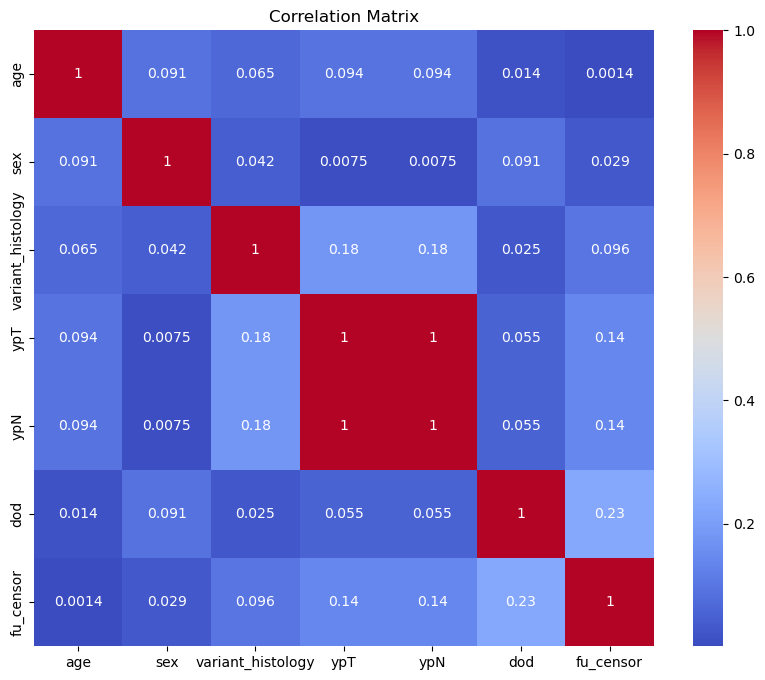

,age,sex,variant_histology,ypT,ypN,dod,fu_censor
age,1.000000,0.091062,0.065236,0.094245,0.094245,0.013798,0.001436
sex,0.091062,1.000000,0.042083,0.007454,0.007454,0.090691,0.029017
variant_histology,0.065236,0.042083,1.000000,0.177123,0.177123,0.025407,0.095669
ypT,0.094245,0.007454,0.177123,1.000000,1.000000,0.054597,0.140617
ypN,0.094245,0.007454,0.177123,1.000000,1.000000,0.054597,0.140617
dod,0.013798,0.090691,0.025407,0.054597,0.054597,1.000000,0.231086
fu_censor,0.001436,0.029017,0.095669,0.140617,0.140617,0.231086,1.000000


In [21]:
# Correlation matrix
correlation_matrix = df_dod.corr().abs()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
df_dod.corr().abs()

In [22]:
# age
logistic_regression(df_dod, 'age', 'dod')

Optimization terminated successfully.
         Current function value: 224.149439
         Iterations 5


,Odds Ratio,Lower CI,Upper CI,P-value
age,0.996748,0.962088,1.032656,0.856829


In [23]:
# sex
logistic_regression(df_dod, 'sex', 'dod')

Optimization terminated successfully.
         Current function value: 228.131299
         Iterations 5


,Odds Ratio,Lower CI,Upper CI,P-value
sex,0.638596,0.303365,1.344275,0.237631


In [24]:
# variant_histology
logistic_regression(df_dod, 'variant_histology', 'dod')

Optimization terminated successfully.
         Current function value: 224.387766
         Iterations 5


,Odds Ratio,Lower CI,Upper CI,P-value
variant_histology,1.130213,0.548852,2.327371,0.739788


In [25]:
# ypT
logistic_regression(df_dod, 'ypT', 'dod')

Optimization terminated successfully.
         Current function value: 225.523396
         Iterations 5


,Odds Ratio,Lower CI,Upper CI,P-value
ypT,0.738095,0.320033,1.702275,0.476298


In [26]:
# ypN
logistic_regression(df_dod, 'ypN', 'dod')

Optimization terminated successfully.
         Current function value: 225.523396
         Iterations 5


,Odds Ratio,Lower CI,Upper CI,P-value
ypN,1.354839,0.587449,3.124675,0.476298


In [27]:
# Adjusted OR - Multivariate 1
logistic_regression(df_dod, ['age','sex','variant_histology','ypT'], 'dod')

Optimization terminated successfully.
         Current function value: 230.273749
         Iterations 5


,Odds Ratio,Lower CI,Upper CI,P-value
age,0.996628,0.961719,1.032804,0.852712
sex,0.636656,0.300557,1.348596,0.238383
variant_histology,1.160604,0.551825,2.440994,0.694581
ypT,0.716440,0.303346,1.692082,0.446968


In [28]:
# Adjusted OR - Multivariate 2
logistic_regression(df_dod, ['age','sex','variant_histology','ypN'], 'dod')

Optimization terminated successfully.
         Current function value: 230.273749
         Iterations 5


,Odds Ratio,Lower CI,Upper CI,P-value
age,0.996628,0.961719,1.032804,0.852712
sex,0.636656,0.300557,1.348596,0.238383
variant_histology,1.160604,0.551825,2.440994,0.694581
ypN,1.395791,0.590988,3.296568,0.446968


# HR - Death by cancer

In [29]:
# age
cox_regression(df_dod, 'fu_censor', 'age', 'dod')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
age,0.9933,0.958906,1.028929,0.7085


In [30]:
# sex
cox_regression(df_dod, 'fu_censor', 'sex', 'dod')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
sex,0.673398,0.356386,1.272399,0.223245


In [31]:
# variant_histology
cox_regression(df_dod, 'fu_censor', 'variant_histology', 'dod')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
variant_histology,1.205413,0.64296,2.259892,0.560159


In [32]:
# ypT
cox_regression(df_dod, 'fu_censor', 'ypT', 'dod')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
ypT,0.944845,0.46292,1.928478,0.876147


In [33]:
# ypN
cox_regression(df_dod, 'fu_censor', 'ypN', 'dod')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
ypN,1.058375,0.518544,2.160198,0.876147


In [34]:
# Adjusted HR - Multivariate 1
cox_regression(df_dod, 'fu_censor', 'age + sex + variant_histology + ypT', 'dod')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
age,0.992360,0.958164,1.027777,0.668179
sex,0.679303,0.356469,1.294510,0.239852
variant_histology,1.165932,0.611429,2.223313,0.641101
ypT,0.922644,0.442757,1.922664,0.829829


In [35]:
# Adjusted HR - Multivariate 2
cox_regression(df_dod, 'fu_censor', 'age + sex + variant_histology + ypN', 'dod')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
age,0.992360,0.958164,1.027777,0.668179
sex,0.679303,0.356469,1.294510,0.239852
variant_histology,1.165932,0.611429,2.223313,0.641101
ypN,1.083841,0.520112,2.258576,0.829829


# OR - Death by other causes

In [36]:
# Copy dataset and drop NANs values
df_doc = df.dropna(subset=['recurrence']).copy()

In [37]:
# Create dummy variables for predictors and outcome
df_doc = pd.get_dummies(df_doc, columns=['sex','variant_histology','ypT_group1','ypN_group1','doc'], drop_first=True)

# sex: Female vs Male
# variant_histology: No vs Yes
# ypT: pT0-pTis-pTa vs pT2-pT3
# ypN: pN0 vs pN1-pN2-pN3
df_doc = df_doc.rename(columns={'ypT_group1_pT2-pT3':'ypT','ypN_group1_pN1-pN2-pN3':'ypN','sex_Male':'sex','variant_histology_Yes':'variant_histology','doc_Yes':'doc'})
df_doc = df_doc[['age','sex','variant_histology','ypT','ypN','doc','fu_censor']]
df_doc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 173
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                173 non-null    int64  
 1   sex                173 non-null    uint8  
 2   variant_histology  173 non-null    uint8  
 3   ypT                173 non-null    uint8  
 4   ypN                173 non-null    uint8  
 5   doc                173 non-null    uint8  
 6   fu_censor          173 non-null    float64
dtypes: float64(1), int64(1), uint8(5)
memory usage: 4.9 KB


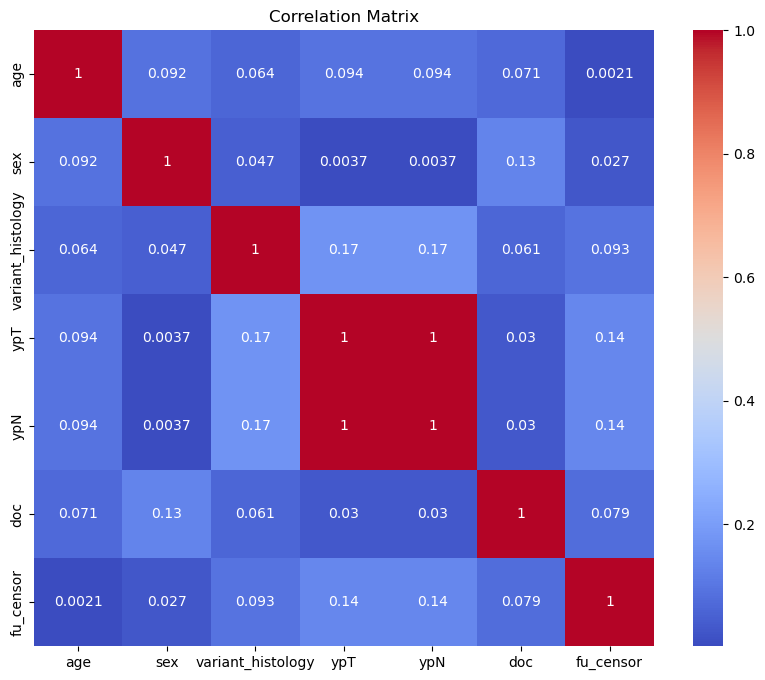

,age,sex,variant_histology,ypT,ypN,doc,fu_censor
age,1.000000,0.091561,0.064155,0.093528,0.093528,0.071165,0.002138
sex,0.091561,1.000000,0.047485,0.003670,0.003670,0.133743,0.027485
variant_histology,0.064155,0.047485,1.000000,0.171809,0.171809,0.061176,0.093339
ypT,0.093528,0.003670,0.171809,1.000000,1.000000,0.030238,0.140837
ypN,0.093528,0.003670,0.171809,1.000000,1.000000,0.030238,0.140837
doc,0.071165,0.133743,0.061176,0.030238,0.030238,1.000000,0.078574
fu_censor,0.002138,0.027485,0.093339,0.140837,0.140837,0.078574,1.000000


In [38]:
# Correlation matrix
correlation_matrix = df_doc.corr().abs()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

correlation_matrix

In [39]:
# age
logistic_regression(df_doc, 'age', 'doc')

Optimization terminated successfully.
         Current function value: inf
         Iterations 6


/Users/alcideschaux/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/alcideschaux/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


,Odds Ratio,Lower CI,Upper CI,P-value
age,1.025689,0.972561,1.08172,0.349947


In [40]:
# sex
logistic_regression(df_doc, 'sex', 'doc')

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


/Users/alcideschaux/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/alcideschaux/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


,Odds Ratio,Lower CI,Upper CI,P-value
sex,3.588785,0.793678,16.22746,0.096953


In [41]:
# variant_histology
logistic_regression(df_doc, 'variant_histology', 'doc')

Optimization terminated successfully.
         Current function value: 497.122829
         Iterations 6


,Odds Ratio,Lower CI,Upper CI,P-value
variant_histology,0.643236,0.218115,1.896951,0.42391


In [42]:
# ypT
logistic_regression(df_doc, 'ypT', 'doc')

Optimization terminated successfully.
         Current function value: 493.367368
         Iterations 6


,Odds Ratio,Lower CI,Upper CI,P-value
ypT,1.300813,0.354805,4.769142,0.691551


In [43]:
# ypN
logistic_regression(df_doc, 'ypN', 'doc')

Optimization terminated successfully.
         Current function value: 493.367368
         Iterations 6


,Odds Ratio,Lower CI,Upper CI,P-value
ypN,0.76875,0.209681,2.818451,0.691551


In [44]:
# Adjusted OR - Multivariate 1
logistic_regression(df_doc, ['age','sex','variant_histology','ypT'], 'doc')

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


/Users/alcideschaux/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/alcideschaux/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


,Odds Ratio,Lower CI,Upper CI,P-value
age,1.033264,0.974183,1.095929,0.276033
sex,3.945078,0.851288,18.282467,0.079400
variant_histology,0.642144,0.210642,1.957583,0.436066
ypT,1.327940,0.344408,5.120156,0.680402


In [45]:
# Adjusted OR - Multivariate 2
logistic_regression(df_doc, ['age','sex','variant_histology','ypN'], 'doc')

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


/Users/alcideschaux/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/alcideschaux/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


,Odds Ratio,Lower CI,Upper CI,P-value
age,1.033264,0.974183,1.095929,0.276033
sex,3.945078,0.851288,18.282467,0.079400
variant_histology,0.642144,0.210642,1.957583,0.436066
ypN,0.753046,0.195307,2.903530,0.680402


# HR - Death by other causes

In [46]:
# age
cox_regression(df_doc, 'fu_censor', 'age', 'doc')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
age,1.030168,0.973915,1.089669,0.299544


In [47]:
# sex
cox_regression(df_doc, 'fu_censor', 'sex', 'doc')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
sex,3.20027,0.735414,13.926473,0.121054


In [48]:
# variant_histology
cox_regression(df_doc, 'fu_censor', 'variant_histology', 'doc')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
variant_histology,0.796868,0.281272,2.257597,0.669116


In [49]:
# ypT
cox_regression(df_doc, 'fu_censor', 'ypT', 'doc')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
ypT,1.754452,0.498998,6.168571,0.380856


In [50]:
# ypN
cox_regression(df_doc, 'fu_censor', 'ypN', 'doc')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
ypN,0.569978,0.162112,2.004017,0.380856


In [51]:
# Adjusted HR - Multivariate 1
cox_regression(df_doc, 'fu_censor', 'age + sex + variant_histology + ypT', 'doc')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
age,1.033579,0.974676,1.096042,0.269947
sex,3.452164,0.785625,15.169364,0.100901
variant_histology,0.776469,0.267632,2.252740,0.641545
ypT,1.872045,0.511524,6.851205,0.343510


In [52]:
# Adjusted HR - Multivariate 2
cox_regression(df_doc, 'fu_censor', 'age + sex + variant_histology + ypN', 'doc')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
age,1.033579,0.974676,1.096042,0.269947
sex,3.452164,0.785625,15.169364,0.100901
variant_histology,0.776469,0.267632,2.252740,0.641545
ypN,0.534175,0.145960,1.954943,0.343510


# OR - Disease-related event

In [53]:
df_dre = df.dropna(subset=['dre']).copy()

In [54]:
# Create dummy variables for predictors and outcome
df_dre = pd.get_dummies(df_dre, columns=['sex','variant_histology','ypT_group1','ypN_group1','dre'], drop_first=True)

# sex: Female vs Male
# variant_histology: No vs Yes
# ypT: pT0-pTis-pTa vs pT2-pT3
# ypN: pN0 vs pN1-pN2-pN3
df_dre = df_dre.rename(columns={'ypT_group1_pT2-pT3':'ypT','ypN_group1_pN1-pN2-pN3':'ypN','sex_Male':'sex','variant_histology_Yes':'variant_histology','dre_Yes':'dre'})
df_dre = df_dre[['age','sex','variant_histology','ypT','ypN','dre','fu_censor']]
df_doc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 173
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                173 non-null    int64  
 1   sex                173 non-null    uint8  
 2   variant_histology  173 non-null    uint8  
 3   ypT                173 non-null    uint8  
 4   ypN                173 non-null    uint8  
 5   doc                173 non-null    uint8  
 6   fu_censor          173 non-null    float64
dtypes: float64(1), int64(1), uint8(5)
memory usage: 9.0 KB


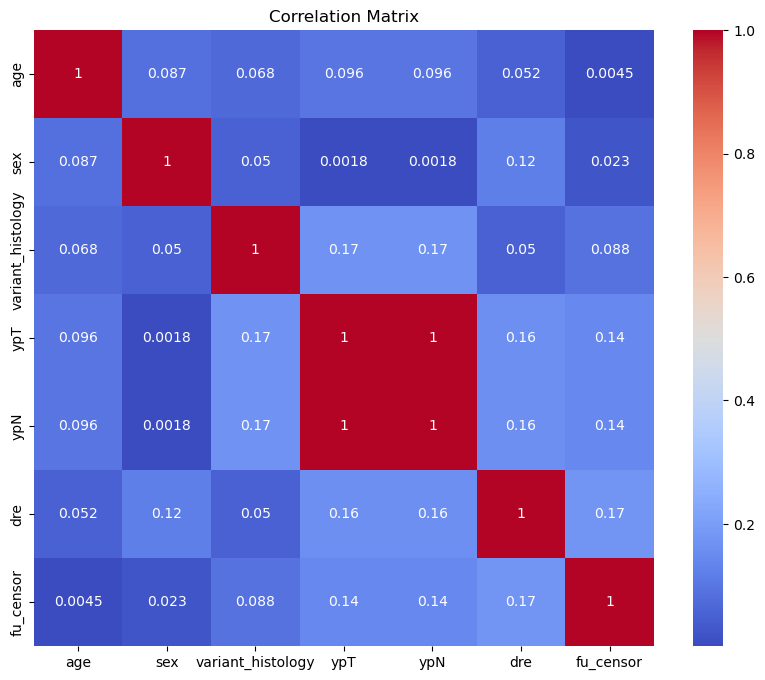

,age,sex,variant_histology,ypT,ypN,dre,fu_censor
age,1.000000,0.087230,0.068491,0.096250,0.096250,0.052098,0.004459
sex,0.087230,1.000000,0.050117,0.001821,0.001821,0.120928,0.023450
variant_histology,0.068491,0.050117,1.000000,0.169217,0.169217,0.050235,0.088238
ypT,0.096250,0.001821,0.169217,1.000000,1.000000,0.160607,0.143364
ypN,0.096250,0.001821,0.169217,1.000000,1.000000,0.160607,0.143364
dre,0.052098,0.120928,0.050235,0.160607,0.160607,1.000000,0.174273
fu_censor,0.004459,0.023450,0.088238,0.143364,0.143364,0.174273,1.000000


In [55]:
# Correlation matrix
correlation_matrix = df_dre.corr().abs()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

correlation_matrix

In [56]:
# age
logistic_regression(df_dre, 'age', 'dre')

Optimization terminated successfully.
         Current function value: 53.412956
         Iterations 4


,Odds Ratio,Lower CI,Upper CI,P-value
age,0.989306,0.959376,1.02017,0.492759


In [57]:
# sex
logistic_regression(df_dre, 'sex', 'dre')

Optimization terminated successfully.
         Current function value: 57.267896
         Iterations 4


,Odds Ratio,Lower CI,Upper CI,P-value
sex,1.75,0.876447,3.494221,0.112701


In [58]:
# variant_histology
logistic_regression(df_dre, 'variant_histology', 'dre')

Optimization terminated successfully.
         Current function value: 53.220644
         Iterations 4


,Odds Ratio,Lower CI,Upper CI,P-value
variant_histology,0.807692,0.429263,1.519738,0.50783


In [59]:
# ypT
logistic_regression(df_dre, 'ypT', 'dre')

Optimization terminated successfully.
         Current function value: 65.977874
         Iterations 4


,Odds Ratio,Lower CI,Upper CI,P-value
ypT,0.448276,0.21123,0.951339,0.036627


In [60]:
# ypN
logistic_regression(df_dre, 'ypN', 'dre')

Optimization terminated successfully.
         Current function value: 65.977874
         Iterations 4


,Odds Ratio,Lower CI,Upper CI,P-value
ypN,2.230769,1.05115,4.73418,0.036627


In [61]:
# Adjusted OR - Multivariate 1
logistic_regression(df_dre, ['age','sex','variant_histology','ypT'], 'dre')

Optimization terminated successfully.
         Current function value: 70.507454
         Iterations 5


,Odds Ratio,Lower CI,Upper CI,P-value
age,0.993905,0.962786,1.026031,0.706435
sex,1.745813,0.862925,3.532011,0.121166
variant_histology,0.917315,0.476487,1.765981,0.796217
ypT,0.456984,0.210522,0.991982,0.047667


In [62]:
# Adjusted OR - Multivariate 2
logistic_regression(df_dre, ['age','sex','variant_histology','ypN'], 'dre')

Optimization terminated successfully.
         Current function value: 70.507454
         Iterations 5


,Odds Ratio,Lower CI,Upper CI,P-value
age,0.993905,0.962786,1.026031,0.706435
sex,1.745813,0.862925,3.532011,0.121166
variant_histology,0.917315,0.476487,1.765981,0.796217
ypN,2.188261,1.008083,4.750093,0.047667


# HR - Disease-related event

In [63]:
# age
cox_regression(df_dre, 'fu_censor', 'age', 'dre')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
age,0.990677,0.964073,1.018015,0.500061


In [64]:
# sex
cox_regression(df_dre, 'fu_censor', 'sex', 'dre')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
sex,1.320764,0.757251,2.303621,0.326965


In [65]:
# variant_histology
cox_regression(df_dre, 'fu_censor', 'variant_histology', 'dre')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
variant_histology,1.026135,0.626636,1.680324,0.918339


In [66]:
# ypT
cox_regression(df_dre, 'fu_censor', 'ypT', 'dre')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
ypT,0.85388,0.506483,1.439557,0.553334


In [67]:
# ypN
cox_regression(df_dre, 'fu_censor', 'ypN', 'dre')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
ypN,1.171125,0.694658,1.974401,0.553334


In [68]:
# Adjusted HR - Multivariate 1
cox_regression(df_dre, 'fu_censor', 'age + sex + variant_histology + ypT', 'dre')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
age,0.992276,0.965027,1.020294,0.585198
sex,1.319176,0.750101,2.319989,0.336207
variant_histology,1.110447,0.663382,1.858798,0.690209
ypT,0.864594,0.502648,1.487168,0.599042


In [69]:
# Adjusted HR - Multivariate 2
cox_regression(df_dre, 'fu_censor', 'age + sex + variant_histology + ypN', 'dre')

,Hazards Ratio,Lower CI,Upper CI,P-value
covariate,,,,
age,0.992276,0.965027,1.020294,0.585198
sex,1.319176,0.750101,2.319989,0.336207
variant_histology,1.110447,0.663382,1.858798,0.690209
ypN,1.156613,0.672419,1.989463,0.599042
